## Experiment No. 4 - Implement and test RBF network

### Radial Basis Function Networks

Radial Basis Function Networks (RBF nets) are used for exactly this scenario: regression or function approximation. We have some data that represents an underlying trend or function and want to model it. RBF nets can learn to approximate the underlying trend using many Gaussians/bell curves. adial Basis Function Networks (RBF nets) are used for exactly this scenario: regression or function approximation. We have some data that represents an underlying trend or function and want to model it. RBF nets can learn to approximate the underlying trend using many Gaussians/bell curves.

## Algorithm

1. Import library
2. RBF function
3. K-means function
4. RBFNet Class
5. Predict and plot

### 1. Import library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image


Bad key "text.kerning_factor" on line 4 in
c:\users\hemant ghuge\anaconda3\envs\tensorflow2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### 2. RBF function

In [2]:
def rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)

### 3. K-means function

In [3]:
def kmeans(X, k):
    """Performs k-means clustering for 1D input
    
    Arguments:
        X {ndarray} -- A Mx1 array of inputs
        k {int} -- Number of clusters
    
    Returns:
        ndarray -- A kx1 array of final cluster centers
    """

    # randomly select initial clusters from input data
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    stds = np.zeros(k)
    converged = False

    while not converged:
        """
        compute distances for each cluster center to each point 
        where (distances[i, j] represents the distance between the ith point and jth cluster)
        """
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))

        # find the cluster that's closest to each point
        closestCluster = np.argmin(distances, axis=1)

        # update clusters by taking the mean of all of the points assigned to that cluster
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)

        # converge if clusters haven't moved
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()

    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)

    clustersWithNoPoints = []
    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        if len(pointsForCluster) < 2:
            # keep track of clusters with no points or 1 point
            clustersWithNoPoints.append(i)
            continue
        else:
            stds[i] = np.std(X[closestCluster == i])

    # if there are clusters with 0 or 1 points, take the mean std of the other clusters
    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))

    return clusters, stds

### 4. RBFNet Class

In [4]:
class RBFNet(object):
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, inferStds=True):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds
 
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)
        
    def fit(self, X, y):
        if self.inferStds:
            # compute stds from data
            self.centers, self.stds = kmeans(X, self.k)
        else:
            # use a fixed std 
            self.centers, _ = kmeans(X, self.k)
            dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
            self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)

        # training
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
                F = a.T.dot(self.w) + self.b

                loss = (y[i] - F).flatten() ** 2

                # backward pass
                error = -(y[i] - F).flatten()

                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error
            print('Loss: {0:.2f}'.format(loss[0]))
                
    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            y_pred.append(F)
        return np.array(y_pred)

### 5. Predict and plot

Loss: 0.06
Loss: 0.13
Loss: 0.14
Loss: 0.13
Loss: 0.12
Loss: 0.11
Loss: 0.11
Loss: 0.10
Loss: 0.09
Loss: 0.09
Loss: 0.08
Loss: 0.08
Loss: 0.08
Loss: 0.07
Loss: 0.07
Loss: 0.07
Loss: 0.06
Loss: 0.06
Loss: 0.06
Loss: 0.06
Loss: 0.05
Loss: 0.05
Loss: 0.05
Loss: 0.05
Loss: 0.05
Loss: 0.05
Loss: 0.04
Loss: 0.04
Loss: 0.04
Loss: 0.04
Loss: 0.04
Loss: 0.04
Loss: 0.04
Loss: 0.03
Loss: 0.03
Loss: 0.03
Loss: 0.03
Loss: 0.03
Loss: 0.03
Loss: 0.03
Loss: 0.03
Loss: 0.03
Loss: 0.03
Loss: 0.02
Loss: 0.02
Loss: 0.02
Loss: 0.02
Loss: 0.02
Loss: 0.02
Loss: 0.02
Loss: 0.02
Loss: 0.02
Loss: 0.02
Loss: 0.02
Loss: 0.02
Loss: 0.02
Loss: 0.02
Loss: 0.02
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.01
Loss: 0.00

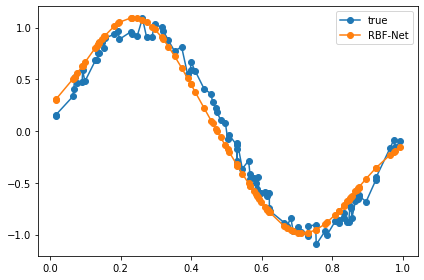

In [5]:
# sample inputs and add noise
NUM_SAMPLES = 100
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * X)  + noise
 
rbfnet = RBFNet(lr=1e-2, k=2)
rbfnet.fit(X, y)
 
y_pred = rbfnet.predict(X)
 
plt.plot(X, y, '-o', label='true')
plt.plot(X, y_pred, '-o', label='RBF-Net')
plt.legend()
 
plt.tight_layout()
plt.show()

## Questions

**1. What do you understand by Radial Basis Function?**

A radial basis function (RBF) is a real-valued function ${\textstyle \varphi }$ whose value depends only on the distance between the input and some fixed point, either the origin, so that ${\textstyle \varphi (\mathbf {x} )=\varphi (\left\|\mathbf {x} \right\|)}$, or some other fixed point ${\textstyle \mathbf {c} }$, called a center, so that ${\textstyle \varphi (\mathbf {x} )=\varphi (\left\|\mathbf {x} -\mathbf {c} \right\|)}$. Any function ${\textstyle \varphi }$ that satisfies the property ${\textstyle \varphi (\mathbf {x} )=\varphi (\left\|\mathbf {x} \right\|)}$ is a radial function. 

**2. Discuss in short the activation function used in RBF network**

In RBF, the activation function of output neuron is linear i.e. “ g(z)= z “ where z is the weighted summation of signals from hidden layer. Multiplying $i^{th}$ row of G with $j^{th}$ columns of W does the weighted summation of signals from the hidden layer which is equal to signal produced by jth output neuron.

**3. Differentiate between Back Propagation and Radial Basis function network.**

Radial Basis Function type Artificial Neural Network models were developed to predict water levels at stations in an experimental drainage basin and in a major river during storm periods. As far as accuracy of predictions is concerned the performance of the RBF model using the &-means clustering technique compares well with that of the MLP with error back propagation method. The RBF network based models are linear in the parameters and therefore guarantee convergence to their optimum values for a particular network architecture. Development of the RBF network model therefore requires less trial and error and thus, less time and effort, than that needed by the MLP with BP approach.

MLPs are advantageous over RBFs when the underlying characteristic feature of data is embedded deeply inside very high dimensional data sets. For example, in image recognition, features depicting the key information about the image is hidden inside tens of thousands of pixel. For such training examples, the redundant features are filtered as the information progress through the stack of hidden layers in MLPs, and as a result, better performance is achieved.

Having only one hidden layer RBFs have much faster convergence rate as compared to MLP. For low dimensional data where deep feature extraction is not required and results are directly correlated with the component of input vectors, then RBF network is usually preferred over MLP. RBFs are universal approximators, and unlike most machine learning models RBF is a robust learning model.

**4. With the help of flowchart, explain algorithm for RBF network.**

Ans:- RBF Network - Load Forecasting Principle

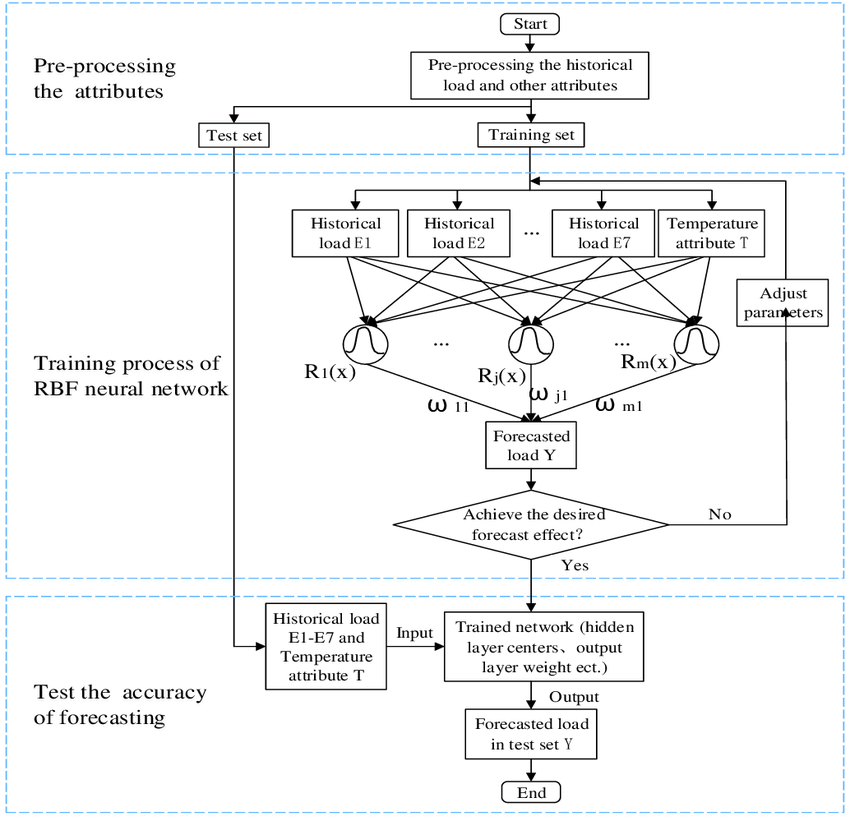

In [6]:
Image(filename="img/flowchart.png")

In order to realize the electricity load forecasting, it is necessary to perform pre-processing on historical load and other attributes, then divide the data into training set and test set. The training set
data is input to the RBF network for learning, and the test set is predicted by the RBF network after learning. The flow chart of RBF neural network load forecasting is shown in above figure.

RBF neural network is a local approximation network, composed of three layers of neurons. The input layer is responsible for passing the input signal to the hidden layer. The hidden layer uses the basis function to make the input data nonlinearly transformed. The output data of the  idden layer is linearly weighted at the output layer as the output of the network.

This paper selects the historical load of seven days before the forecast day and the maximum temperature of the day as the input data, which is shown as:

$$X=(E_1,E_2 ,E_3 ,E_4 ,E_5 ,E_6 ,E_7 ,T)$$

Gaussian kernel function is used in the hidden layer of RBF neural network in this paper. The weight
is calculated by the distance between the input data and the centre of the function. Compared with the
Sigmoid function of BP neural network, which is used in the global, the Gaussian function’s
convergence speed is faster. Which is shown as:

$$R_j = \exp-\frac{{||X-c_j||}^2}{2{\sigma_j}^2}  j = 1,2,.....,m$$

where $X=(E_1,E_2 ,E_3 ,E_4 ,E_5 ,E_6 ,E_7 ,T)$ is an 8-dimensional vector. $c_j$ is the centre of the Gaussian function of the jth node of the hidden layer, and is also an 8-dimensional vector. $\sigma_j$ is the normalized constant of the jth neuron node in the hidden layer. m is the number of neuron in the hidden layer. Output layer:

$$y = \sum_{j=1}^m w_{j,1}R_j j=1,2,....,m $$

where $w_{j,1}$ is the connection weight between the jth neuron of the hidden layer and the output (Y).

The learning process of RBF neural network is as follows. First, the training set of input data is preprocessed into the form of formula 1. Then the processed data is calculated by the formula 2 to obtain output data of the hidden layer. Then through the formula 3 to get the output layer weight information. Finally, the test set is input to the trained network to get the forecast data.

**5. State merits and applications of RBF network.**

Ans:- 
**Advantages of using RBNN**

+ Easy and fixed three-layer architecture

+ Easier than neural networks

+ Smooth surface, stable and good generalization

+ Very good in input noise tolerance

+ Training in RBNN is faster than in Multi-layer Perceptron (MLP) → takes many interactions in MLP.

+ We can easily interpret what is the meaning / function of the each node in hidden layer of the RBNN. This is difficult in MLP.

+ (what should be the # of nodes in hidden layer & the # of hidden layers) this parameterization is difficult in MLP. But this is not found in RBNN.

+ Classification will take more time in RBNN than MLP.

**Applications of RBF**

Applications are manifold, they include

+ finite element or spectral methods for the solution of partial differential equations (Fornberg 1999),
+ neural networks with radial basis functions, and machine learning (Cucker and Smale 2002, Schaback and Wendland 2006),
+ approximations on spheres, (Freeden et al. 1998, Golitschek and Light 2000)
+ statistical approximations, where positive definite kernels are very important, see (Nisbet et al. 2009)
+ geophysical research (Freeden et al. 1998),
+ many engineering applications (Ferreira et al. 2007).

### References 
[1] https://pythonmachinelearning.pro/using-neural-networks-for-regression-radial-basis-function-networks/

Author Name:- Hemant Ghuge <br/>
LinkedIn:- https://www.linkedin.com/in/hemantghuge/ <br/>
GitHub:- https://github.com/HemantGorakshGhuge <br/>